In [212]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [192]:
# Read in file 
data = pd.read_csv("../data/curated/outliers_removed.csv")

# Change Weekly Rental Price columns to first column
price = data["Weekly Rental Price"]
data = data.drop(["Weekly Rental Price"], axis = 1)
data.insert(0, "Weekly Rental Price", price)

In [213]:
data = pd.read_csv("../data/curated/feature_data.csv")
data = data[['Weekly Rental Price', 'Postcode', 'Baths', 'Bedrooms','Parking','Crime Count','Count_Station','Income Per Person']]
#,'Income Per Person']

/var/folders/t7/dnx7ygys43vfq00ddy255g680000gn/T/ipykernel_76927/1740506516.py:1: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/curated/feature_data.csv")


In [214]:
data = data.dropna()
data = data[data["Income Per Person"] != "np"]

In [197]:
# Take out postcode column
postcode = data["Postcode"]

In [200]:
# Apply one hot encoding on Postcode
new_data = pd.get_dummies(data, columns = ['Postcode'])

In [201]:
# Split features and predict results
y = new_data['Weekly Rental Price']
x = new_data.iloc[:,1:]

In [202]:
# Processed X into value between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [203]:
# Split the data set into training/testing and validation sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [206]:
# Create model and train the model
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.1), input_shape=(416,)),
    Dense(32, activation='relu', kernel_regularizer = regularizers.l2(0.1)),
    Dense(1, activation='linear', kernel_regularizer = regularizers.l2(0.1))])

model.compile(optimizer = "adam",
              loss='mean_squared_logarithmic_error',
              metrics=['msle'])

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
925/925 [==============================] - 5s 3ms/step - loss: 13.5512 - msle: 9.7460 - val_loss: 7.5682 - val_msle: 3.8703
Epoch 2/100
925/925 [==============================] - 3s 3ms/step - loss: 6.7050 - msle: 3.2001 - val_loss: 5.9972 - val_msle: 2.7145
Epoch 3/100
925/925 [==============================] - 2s 2ms/step - loss: 5.5646 - msle: 2.5078 - val_loss: 5.0925 - val_msle: 2.2642
Epoch 4/100
925/925 [==============================] - 2s 2ms/step - loss: 4.7839 - msle: 2.1368 - val_loss: 4.4141 - val_msle: 1.9323
Epoch 5/100
925/925 [==============================] - 2s 2ms/step - loss: 4.1829 - msle: 1.8468 - val_loss: 3.8791 - val_msle: 1.6556
Epoch 6/100
925/925 [==============================] - 2s 2ms/step - loss: 3.7026 - msle: 1.6078 - val_loss: 3.4463 - val_msle: 1.4659
Epoch 7/100
925/925 [==============================] - 2s 2ms/step - loss: 3.3111 - msle: 1.4138 - val_loss: 3.0903 - val_msle: 1.2550
Epoch 8/100
925/925 [==============================] -

199/199 [==============================] - 0s 2ms/step - loss: 0.3696 - msle: 0.2829


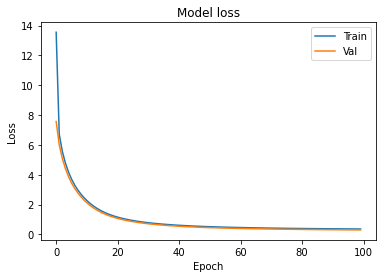

In [207]:
# Do the model evaluation
model.evaluate(X_test, Y_test)[1]

# Plot the model performance
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

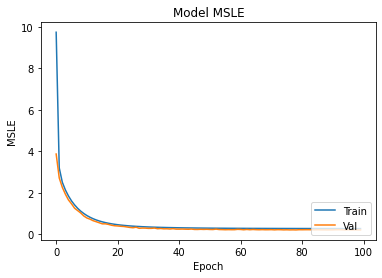

In [208]:
plt.plot(hist.history['msle'])
plt.plot(hist.history['val_msle'])
plt.title('Model MSLE')
plt.ylabel('MSLE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
# Predict the va;idation set
prediction = model.predict(X_val)

# Calculate the absolute errors
error = prediction - Y_val[0]
error = [abs(x) for x in error]

# Print out the mean absolute error (mae)
np.mean(error)

In [ ]:
# calculate the absolute errors of baseline model
y_mode = mode(Y_val)
baseline_error = [abs(y_mode - x) for x in Y_val]
np.mean(baseline_error)

In [209]:
post_data = new_data.iloc[:,1:]
post_data.insert(0, "Postcode", postcode)

In [210]:
post_data

,Postcode,Baths,Bedrooms,Parking,Crime Count,Count_Station,Income Per Person,Postcode_3000,Postcode_3002,Postcode_3003,...,Postcode_3976,Postcode_3977,Postcode_3978,Postcode_3980,Postcode_3981,Postcode_3984,Postcode_3987,Postcode_3992,Postcode_3995,Postcode_3996
0,3000,0,0,1,16212,45.0,11826.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3000,0,0,1,16212,45.0,11826.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3000,0,0,1,16212,45.0,11826.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3000,0,0,1,16212,45.0,11826.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3000,0,0,1,16212,45.0,11826.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42824,3996,1,2,0,267,0.0,8846.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42825,3996,1,2,1,267,0.0,8846.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42826,3996,1,2,1,267,0.0,8846.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
42827,3996,2,3,1,267,0.0,8846.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [211]:
# Update population in 2023/223/2025
pop = pd.read_csv("../data/curated/predicted_population.csv")
pop_2023 = pop[['Postcode','2023']]
pop_2024 = pop[['Postcode','2024']]
pop_2025 = pop[['Postcode','2025']]

pop_2023 = pd.merge(pop_2023, post_data, how = 'inner', on = ['Postcode'])
pop_2023 = pop_2023.drop(labels = ['Population'],axis = 1) 
pop_2023 = pop_2023.iloc[:,1:]

pop_2023['Count_School'] = pop_2023['Count_School'].fillna(value = 0)
pop_2023['Count_Station'] = pop_2023['Count_Station'].fillna(value = 0)
pop_2023 = pop_2023.dropna(axis = 0)
pop_2023 = pop_2023[(pop_2023['Baths'] > 0) & (pop_2023['Bedrooms'] > 0)]
pred_2023 = model.predict(pop_2023)
data.insert(7, 'Pred_2023', pred_2023)

pop_2024 = pd.merge(pop_2024, post_data, how = 'inner', on = ['Postcode'])
pop_2024 =pop_2024.drop(labels = ['Population'],axis = 1) 
pop_2024 = pop_2024.iloc[:,1:]

pop_2024['Count_School'] = pop_2024['Count_School'].fillna(value = 0)
pop_2024['Count_Station'] = pop_2024['Count_Station'].fillna(value = 0)
pop_2024 = pop_2024.dropna(axis=0)
pop_2024 = pop_2024[(pop_2024['Baths'] > 0) & (pop_2024['Bedrooms'] > 0)]
pred_2024 = model.predict(pop_2024)
data.insert(8, 'Pred_2024', pred_2024)

pop_2025 = pd.merge(pop_2025, post_data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'], axis=1) 
pop_2025 = pop_2025.iloc[:,1:]

pop_2025['Count_School'] = pop_2025['Count_School'].fillna(value = 0)
pop_2025['Count_Station'] = pop_2025['Count_Station'].fillna(value = 0)
pop_2025 = pop_2025.dropna(axis=0)
pop_2025 = pop_2025[(pop_2025['Baths'] > 0) & (pop_2025['Bedrooms'] > 0)]
pred_2025 = model.predict(pop_2025)
data.insert(9, 'Pred_2025', pred_2025)

KeyError: "['Population'] not found in axis"

In [145]:
# Calculate growth rate
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data['rate_2024'] = (data['Pred_2024'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data['rate_2025'] = (data['Pred_2025'] - data['Weekly Rental Price']) / data['Weekly Rental Price']
data = data[["Postcode", "Weekly Rental Price", "Pred_2023", "Pred_2024", "Pred_2025", "rate_2023", "rate_2024", "rate_2025"]]


In [146]:
# Group by the data by the postcode
data = data.groupby(by = ['Postcode']).mean()
data = data.sort_values(by = ['rate_2023'], ascending = False)
data = data.head(10)
data.to_csv("../data/curated/NNpredi.csv")

In [ ]:
data